In [2]:
import pandas as pd

# Load the uploaded CSV file to check its content
file_path = '/Users/shamalachandrappa/Desktop/Git Hub Push Everyday/DL/Assignment 1/diabetes.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()

,-0.294118,0.487437,0.180328,-0.292929,0,0.00149028,-0.53117,-0.0333333,0.1
0,-0.882353,-0.145729,0.081967,-0.414141,0.000000,-0.207153,-0.766866,-0.666667,1
1,-0.058824,0.839196,0.049180,0.000000,0.000000,-0.305514,-0.492741,-0.633333,0
2,-0.882353,-0.105528,0.081967,-0.535354,-0.777778,-0.162444,-0.923997,0.000000,1
3,0.000000,0.376884,-0.344262,-0.292929,-0.602837,0.284650,0.887276,-0.600000,0
4,-0.411765,0.165829,0.213115,0.000000,0.000000,-0.236960,-0.894962,-0.700000,1


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

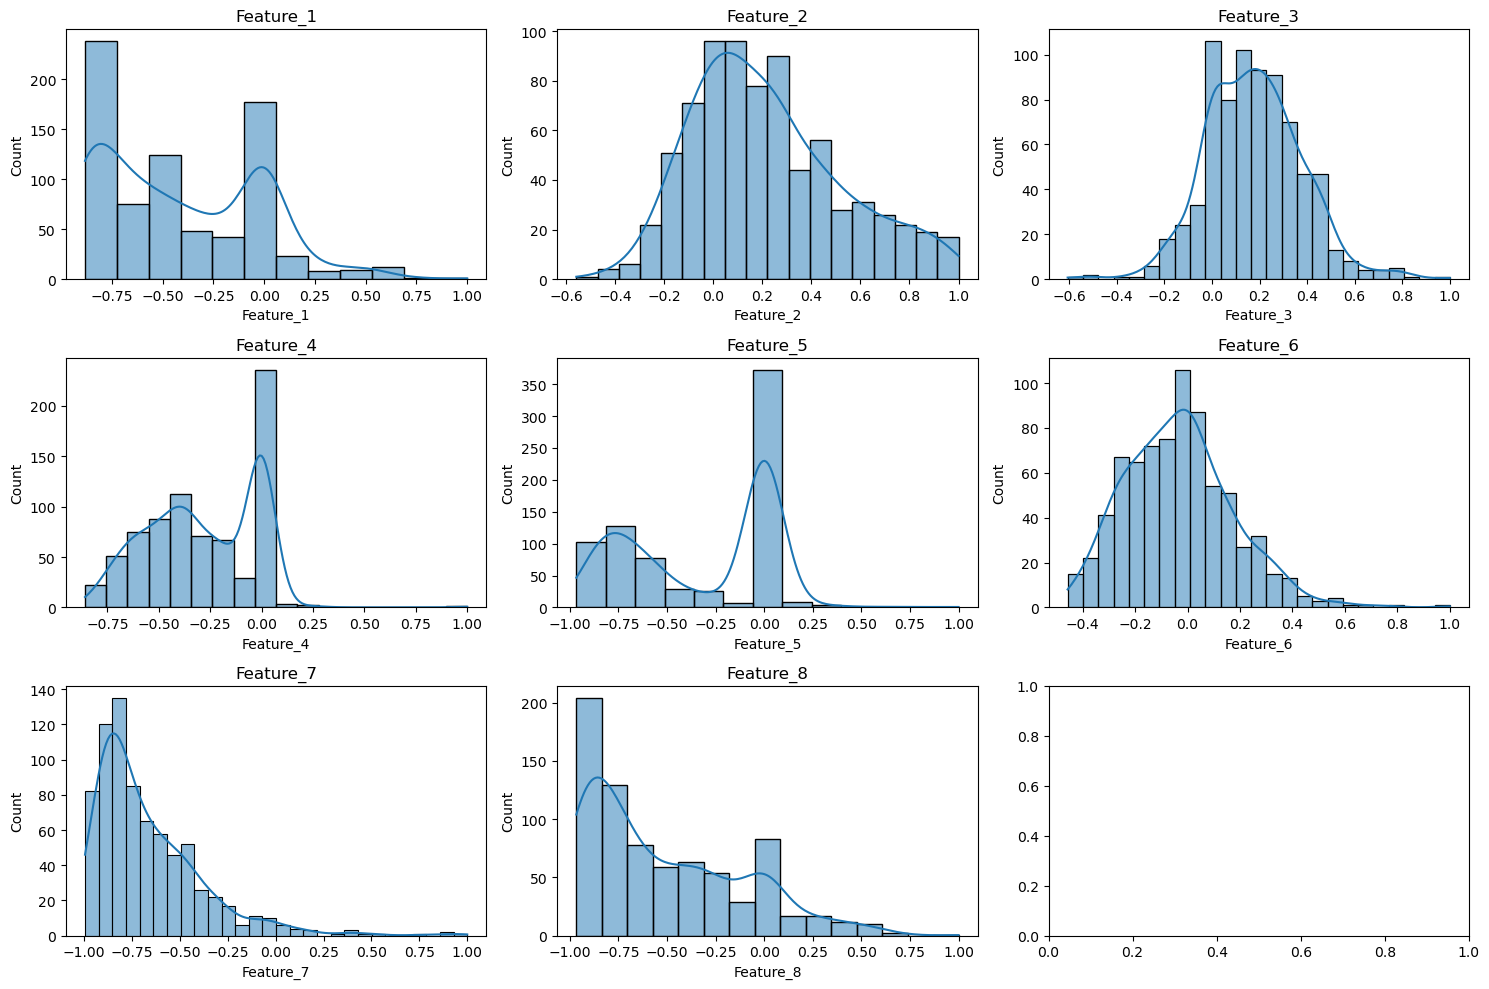

Feature_1    0
Feature_2    0
Feature_3    0
Feature_4    0
Feature_5    0
Feature_6    0
Feature_7    0
Feature_8    0
Label        0
dtype: int64

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Renaming columns for clarity
data.columns = [f'Feature_{i+1}' for i in range(data.shape[1]-1)] + ['Label']

# Check for missing values
missing_values = data.isnull().sum()

# Visualize the distribution of features using histograms
fig, axs = plt.subplots(3, 3, figsize=(15, 10))
axs = axs.ravel()

for i in range(data.shape[1]-1):
    sns.histplot(data[f'Feature_{i+1}'], ax=axs[i], kde=True)
    axs[i].set_title(f'Feature_{i+1}')

plt.tight_layout()
plt.show()

missing_values


In [10]:
# Check for columns with zero variance (constant values)
zero_variance_features = X_scaled_df.var()[X_scaled_df.var() == 0]

# Show columns with zero variance
zero_variance_features


Series([], dtype: float64)

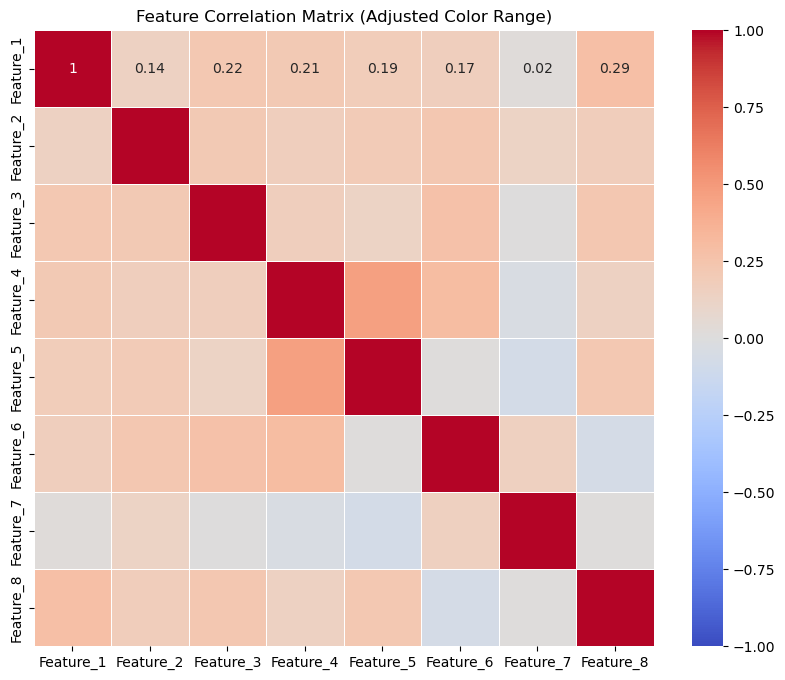

In [11]:
# Re-plot the heatmap with adjusted color range and finer annotations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Feature Correlation Matrix (Adjusted Color Range)')
plt.show()


In [12]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = X_scaled_df.quantile(0.25)
Q3 = X_scaled_df.quantile(0.75)

# Calculate Interquartile Range (IQR)
IQR = Q3 - Q1

# Define outliers as values below Q1 - 1.5*IQR or above Q3 + 1.5*IQR
outlier_mask = ((X_scaled_df < (Q1 - 1.5 * IQR)) | (X_scaled_df > (Q3 + 1.5 * IQR))).any(axis=1)

# Display number of outliers
num_outliers = outlier_mask.sum()

# Remove outliers from the dataset
X_no_outliers = X_scaled_df[~outlier_mask]
y_no_outliers = y[~outlier_mask]

num_outliers, X_no_outliers.shape, y_no_outliers.shape


(47, (711, 8), (711,))

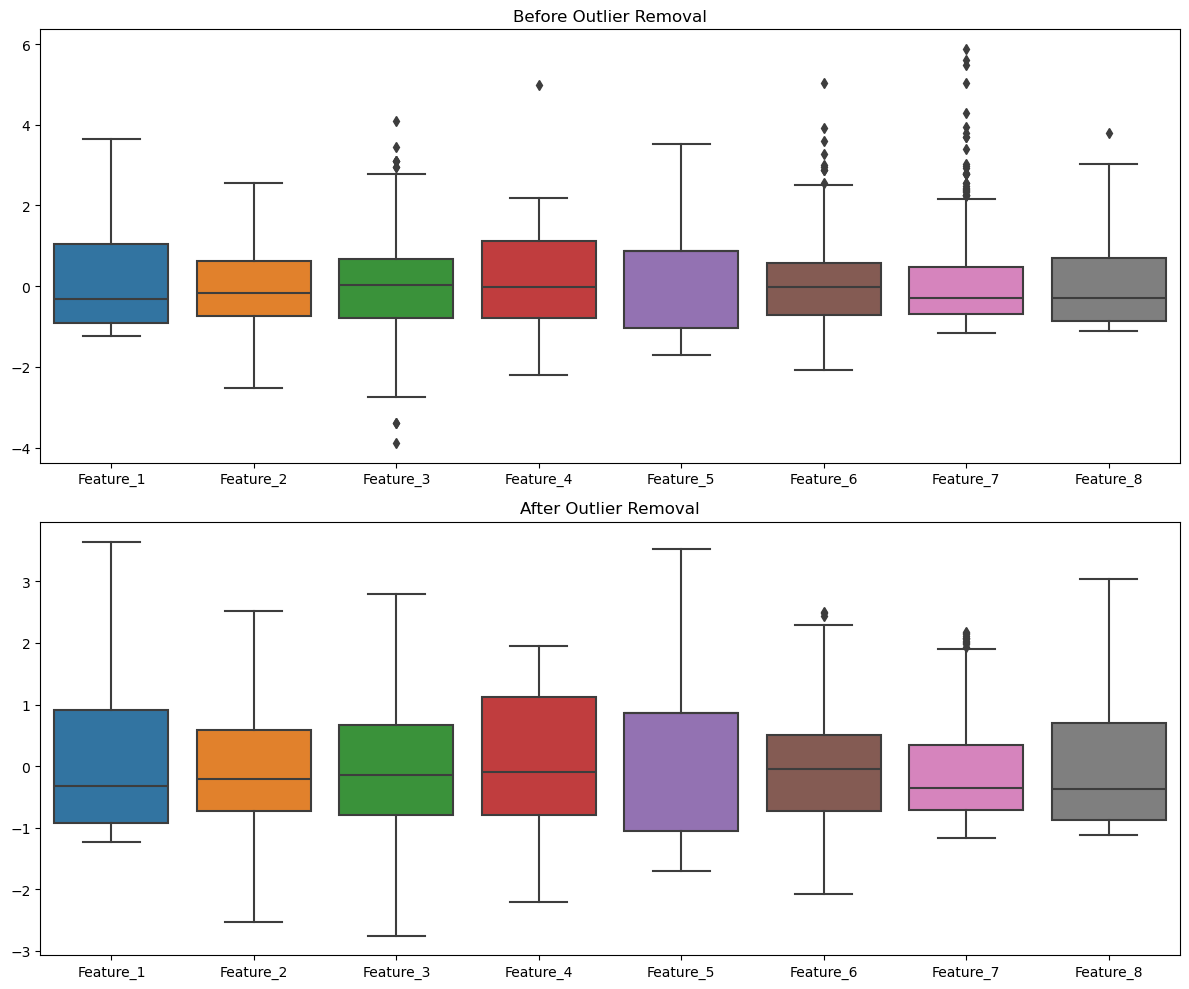

In [13]:
# Visualizing the data before and after outlier removal using box plots
fig, axs = plt.subplots(2, 1, figsize=(12, 10))

# Before outlier removal
sns.boxplot(data=X_scaled_df, ax=axs[0])
axs[0].set_title('Before Outlier Removal')

# After outlier removal
sns.boxplot(data=X_no_outliers, ax=axs[1])
axs[1].set_title('After Outlier Removal')

plt.tight_layout()
plt.show()


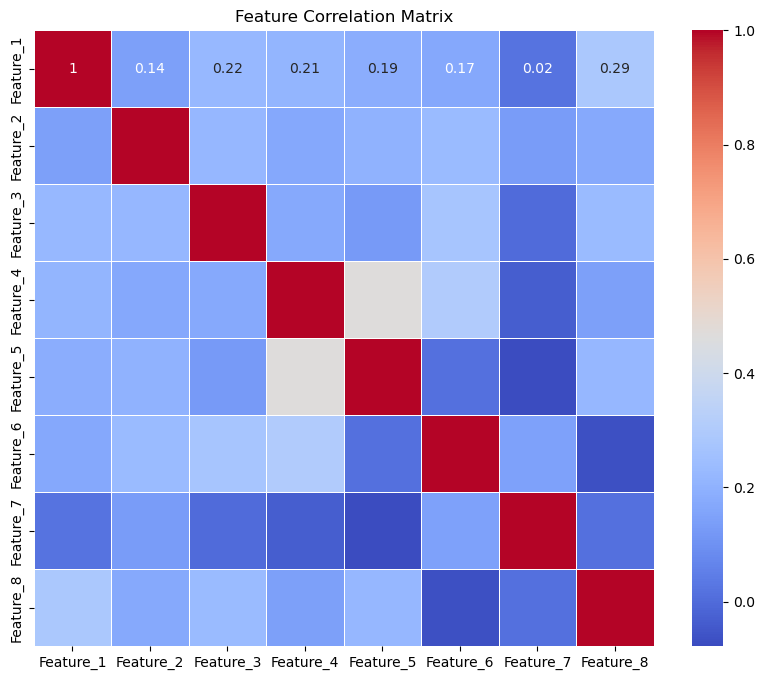

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8
0,-1.228637,-1.188317,-0.469641,-0.481314,0.863068,-0.851446,-0.365488,-0.374288
1,0.903546,2.027629,-0.632527,1.120903,0.863068,-1.330385,0.603099,-0.291038
2,-1.228637,-1.057054,-0.469641,-0.950259,-1.209017,-0.633749,-0.920691,1.290676
3,1.055845,0.518102,-2.587158,-0.012372,-0.742955,1.543241,5.479222,-0.207791
4,-0.010247,-0.171028,0.181905,1.120903,0.863068,-0.996582,-0.818100,-0.457535


In [9]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Step 1: Feature Scaling using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert the scaled data back into a DataFrame for clarity
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Step 2: Check the correlation between features using a correlation matrix
correlation_matrix = X_scaled_df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()

# Show the first few rows of the scaled features
X_scaled_df.head()


In [14]:
from sklearn.preprocessing import PolynomialFeatures

# Create interaction and polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
X_poly = poly.fit_transform(X_no_outliers)

# Get the new feature names
feature_names = poly.get_feature_names_out(X_no_outliers.columns)

# Convert back to DataFrame for clarity
X_poly_df = pd.DataFrame(X_poly, columns=feature_names)

# Show the first few rows of the new feature set
X_poly_df.head(), X_poly_df.shape


(   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
 0  -1.228637  -1.188317  -0.469641  -0.481314   0.863068  -0.851446   
 1   0.903546   2.027629  -0.632527   1.120903   0.863068  -1.330385   
 2  -1.228637  -1.057054  -0.469641  -0.950259  -1.209017  -0.633749   
 3  -0.010247  -0.171028   0.181905   1.120903   0.863068  -0.996582   
 4  -0.619442  -1.418025  -1.772730  -0.246843  -1.246805  -0.212864   
 
    Feature_7  Feature_8  Feature_1^2  Feature_1 Feature_2  ...  Feature_5^2  \
 0  -0.365488  -0.374288     1.509549             1.460010  ...     0.744886   
 1   0.603099  -0.291038     0.816395             1.832056  ...     0.744886   
 2  -0.920691   1.290676     1.509549             1.298735  ...     1.461722   
 3  -0.818100  -0.457535     0.000105             0.001753  ...     0.744886   
 4  -0.676281  -0.790527     0.383709             0.878384  ...     1.554522   
 
    Feature_5 Feature_6  Feature_5 Feature_7  Feature_5 Feature_8  Feature_6^2  \
 0

In [15]:
from sklearn.preprocessing import PolynomialFeatures

# Create interaction and polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
X_poly = poly.fit_transform(X_no_outliers)

# Get the new feature names
feature_names = poly.get_feature_names_out(X_no_outliers.columns)

# Convert back to DataFrame for clarity
X_poly_df = pd.DataFrame(X_poly, columns=feature_names)

# Show the first few rows of the new feature set
X_poly_df.head(), X_poly_df.shape


(   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
 0  -1.228637  -1.188317  -0.469641  -0.481314   0.863068  -0.851446   
 1   0.903546   2.027629  -0.632527   1.120903   0.863068  -1.330385   
 2  -1.228637  -1.057054  -0.469641  -0.950259  -1.209017  -0.633749   
 3  -0.010247  -0.171028   0.181905   1.120903   0.863068  -0.996582   
 4  -0.619442  -1.418025  -1.772730  -0.246843  -1.246805  -0.212864   
 
    Feature_7  Feature_8  Feature_1^2  Feature_1 Feature_2  ...  Feature_5^2  \
 0  -0.365488  -0.374288     1.509549             1.460010  ...     0.744886   
 1   0.603099  -0.291038     0.816395             1.832056  ...     0.744886   
 2  -0.920691   1.290676     1.509549             1.298735  ...     1.461722   
 3  -0.818100  -0.457535     0.000105             0.001753  ...     0.744886   
 4  -0.676281  -0.790527     0.383709             0.878384  ...     1.554522   
 
    Feature_5 Feature_6  Feature_5 Feature_7  Feature_5 Feature_8  Feature_6^2  \
 0

In [16]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensions
pca = PCA(n_components=0.95)  # Keep 95% of the variance
X_pca = pca.fit_transform(X_poly_df)

# Check the shape after PCA
X_pca.shape, sum(pca.explained_variance_ratio_)  # Sum of explained variance to confirm it's close to 95%


((711, 36), 0.9572799981035592)

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Instantiate the logistic regression model
log_reg = LogisticRegression(max_iter=1000)

# Apply RFE to reduce features
rfe = RFE(estimator=log_reg, n_features_to_select=10)  # Selecting top 10 features
X_rfe = rfe.fit_transform(X_poly_df, y_no_outliers)

# Check the selected features
selected_features = np.array(X_poly_df.columns)[rfe.support_]
X_rfe.shape, selected_features


((711, 10),
 array(['Feature_1', 'Feature_2', 'Feature_5', 'Feature_6', 'Feature_7',
        'Feature_8', 'Feature_1 Feature_3', 'Feature_3 Feature_8',
        'Feature_6^2', 'Feature_8^2'], dtype=object))

In [5]:
from sklearn.model_selection import train_test_split

# Splitting the data into features and label
X = data.drop(columns='Label')
y = data['Label']

# Perform the split (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Confirm the shapes of the train and test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((530, 8), (228, 8), (530,), (228,))

In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the model architecture
model = models.Sequential([
    layers.InputLayer(input_shape=(X_train.shape[1],)),
    layers.Dense(16, activation='relu'),   # Hidden layer with 16 units
    layers.Dense(8, activation='relu'),    # Hidden layer with 8 units
    layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

# Check the model summary
model.summary()


Epoch 1/20


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5685 - loss: 0.6893 - val_accuracy: 0.7075 - val_loss: 0.6428
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6735 - loss: 0.6481 - val_accuracy: 0.7830 - val_loss: 0.6230
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7427 - loss: 0.6232 - val_accuracy: 0.7453 - val_loss: 0.6083
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7026 - loss: 0.6079 - val_accuracy: 0.6698 - val_loss: 0.5970
Epoch 5/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6974 - loss: 0.6003 - val_accuracy: 0.6698 - val_loss: 0.5881
Epoch 6/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6787 - loss: 0.5843 - val_accuracy: 0.6698 - val_loss: 0.5786
Epoch 7/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6801 - loss: 0.5831 - val_accuracy: 0.6792 - val_loss: 0.5689
Epoch 8/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6986 - loss: 0.5720 - val_accuracy: 0.7075 - val_loss: 0.5589
Epo

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 869 (3.40 KB)

 Trainable params: 289 (1.13 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 580 (2.27 KB)

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

# Create TensorDatasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Create DataLoader
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define the model architecture in PyTorch
class DiabetesModel(nn.Module):
    def __init__(self):
        super(DiabetesModel, self).__init__()
        self.fc1 = nn.Linear(8, 16)
        self.fc2 = nn.Linear(16, 8)
        self.fc3 = nn.Linear(8, 1)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return x

# Instantiate the model, define the loss function and optimizer
model = DiabetesModel()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 20
for epoch in range(epochs):
    model.train()
    for data, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(data)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    
    print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item()}')

# Check model structure
model


Epoch 1/20, Loss: 0.7288005352020264
Epoch 2/20, Loss: 0.6966213583946228
Epoch 3/20, Loss: 0.6753045916557312
Epoch 4/20, Loss: 0.670511782169342
Epoch 5/20, Loss: 0.6432273387908936
Epoch 6/20, Loss: 0.6005695462226868
Epoch 7/20, Loss: 0.5887035727500916
Epoch 8/20, Loss: 0.5392877459526062
Epoch 9/20, Loss: 0.5276394486427307
Epoch 10/20, Loss: 0.619854748249054
Epoch 11/20, Loss: 0.5782228112220764
Epoch 12/20, Loss: 0.5173710584640503
Epoch 13/20, Loss: 0.5657578110694885
Epoch 14/20, Loss: 0.6533328890800476
Epoch 15/20, Loss: 0.3960074484348297
Epoch 16/20, Loss: 0.38971543312072754
Epoch 17/20, Loss: 0.42429229617118835
Epoch 18/20, Loss: 0.3936891555786133
Epoch 19/20, Loss: 0.37498393654823303
Epoch 20/20, Loss: 0.38029754161834717


DiabetesModel(
  (fc1): Linear(in_features=8, out_features=16, bias=True)
  (fc2): Linear(in_features=16, out_features=8, bias=True)
  (fc3): Linear(in_features=8, out_features=1, bias=True)
)